In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
insurance_data = pd.read_csv('medical_data.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_data.shape

(1338, 7)

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\divya\AppData\Local\Temp\ipykernel_14716\1422348741.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'], bins=30, kde=True)


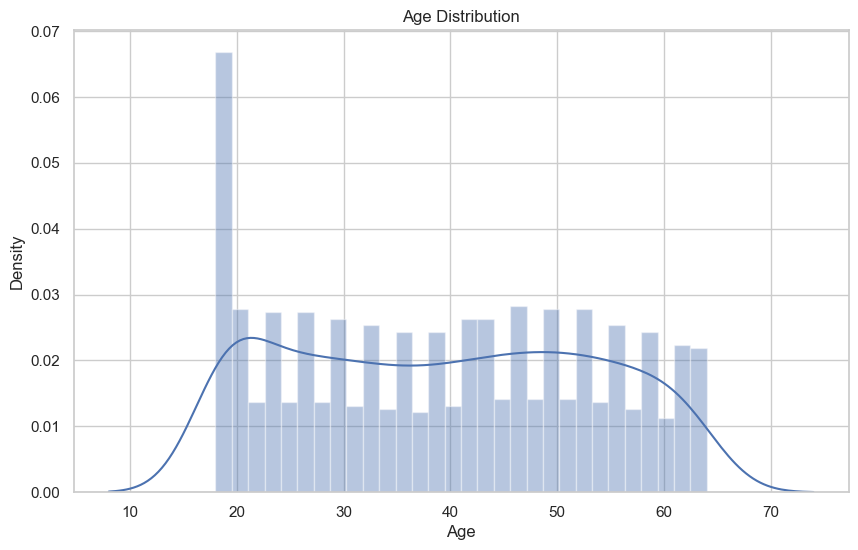

In [9]:
## distribution of age value
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\2942014185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_data, palette='Set2')


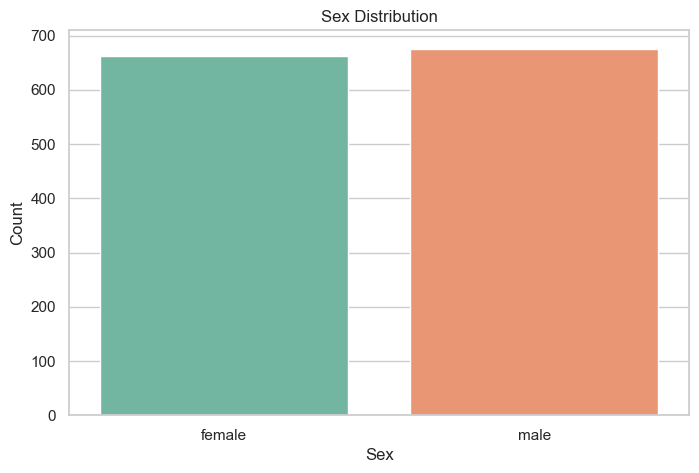

In [10]:
## Gender distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=insurance_data, palette='Set2')
plt.title('Sex Distribution')
plt.xlabel("Sex")
plt.ylabel('Count')
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\3543148794.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'], bins=30, kde=True)


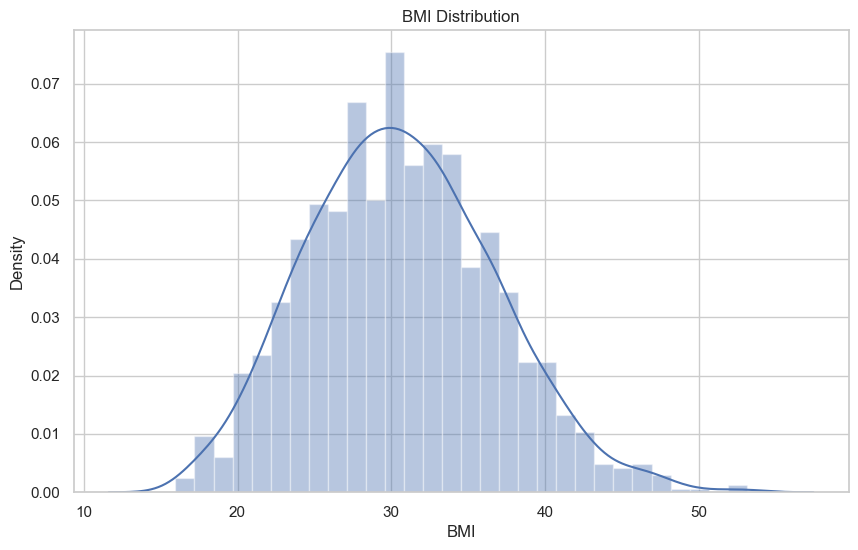

In [11]:
## bmi distribution

plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\4024424486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_data, palette='Set2')


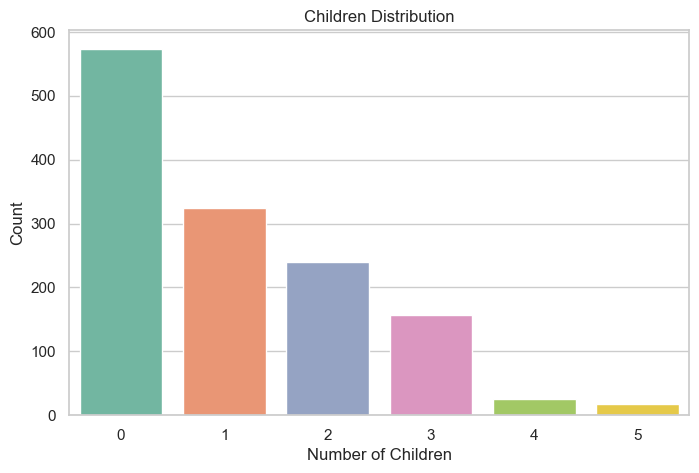

In [12]:
## children column 
plt.figure(figsize=(8, 5))
sns.countplot(x='children', data=insurance_data, palette='Set2')
plt.title('Children Distribution')
plt.xlabel("Number of Children")
plt.ylabel('Count')
plt.show()

In [13]:
insurance_data['children'].value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\1587972183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_data, palette='Set2')


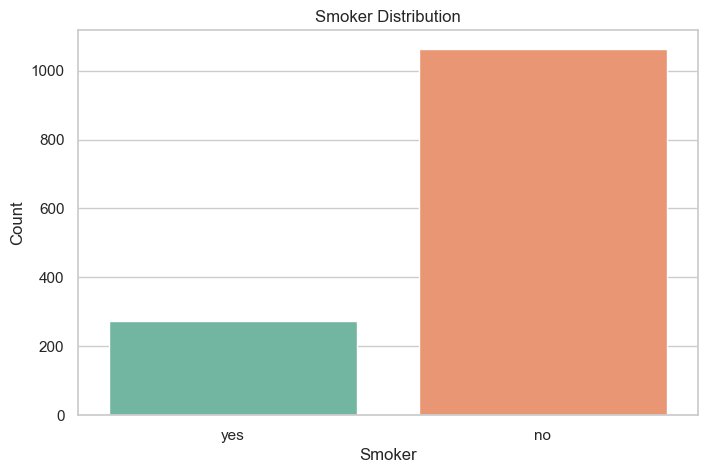

In [14]:
# smoker distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=insurance_data, palette='Set2')
plt.title('Smoker Distribution')
plt.xlabel("Smoker")
plt.ylabel('Count')
plt.show()

In [15]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\2393009420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_data, palette='Set2')


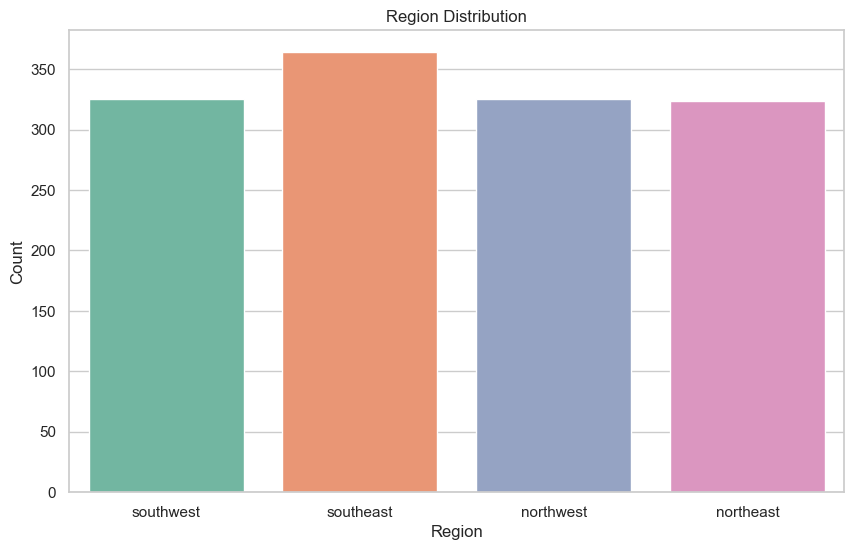

In [16]:
## region column distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=insurance_data, palette='Set2')
plt.title('Region Distribution')
plt.xlabel("Region")
plt.ylabel('Count')
plt.show()

In [17]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\4282915952.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'], bins=30, kde=True)


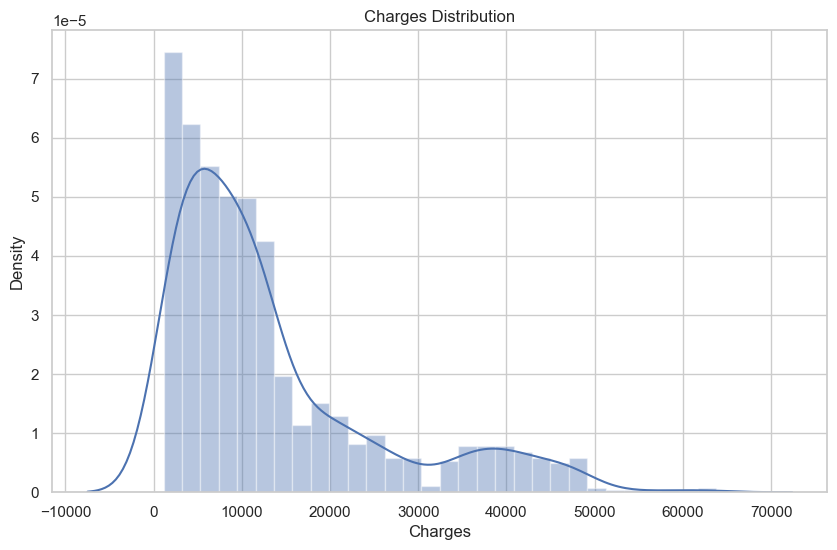

In [18]:
## distribution of charges value

plt.figure(figsize=(10, 6))
sns.distplot(insurance_data['charges'], bins=30, kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()

## Data Pre-processing

In [19]:
## Encoding categorical variables 

insurance_data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
insurance_data.replace({'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}}, inplace=True)

insurance_data.head()

C:\Users\divya\AppData\Local\Temp\ipykernel_14716\3091844185.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_14716\3091844185.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\divya\AppData\Local\Temp\ipykernel_14716\3091844185.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [21]:
X = insurance_data.drop('charges', axis=1)
Y = insurance_data['charges']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
## predicting on training data 

Y_train_pred = model.predict(X_train)

# r2 error
r2_train = r2_score(Y_train, Y_train_pred)
print(f"R2 score on training data: {r2_train:.4f}")

# mean squared error
mse_train = mean_squared_error(Y_train, Y_train_pred)
print(f"Mean Squared Error on training data: {mse_train:.4f}")

R2 score on training data: 0.7520
Mean Squared Error on training data: 36104122.8751


In [27]:
## predicting on testing data

Y_test_pred = model.predict(X_test)

# r2 error
r2_test = r2_score(Y_test, Y_test_pred)
print(f"R2 score on testing data: {r2_test:.4f}")

# mean squared error
mse_test = mean_squared_error(Y_test, Y_test_pred)
print(f"Mean Squared Error on testing data: {mse_test:.4f}")

R2 score on testing data: 0.7445
Mean Squared Error on testing data: 38364832.1905


In [40]:
## Building a predictive system 

input_data = (24,1,26.6,0,0,1)

## convert it into the numpy array
input_data_as_numpy_array = np.asarray(input_data)

## reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print("The insurance cost is USD:",prediction[0])

The insurance cost is USD: 2436.3346364567096


c:\Users\divya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
